# 타이타닉 

## 1. 라이브러리 및 데이터

## Library & Data 불러오기

In [1]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 불러오기
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무 모델 불러오기

In [2]:
# 데이터 불러오기
train = pd.read_csv('C:/Users/Administrator/Desktop/titanic/train.csv')# 모델 학습 파일
test = pd.read_csv('C:/Users/Administrator/Desktop/titanic/test.csv')# 모델 시험지 파일
submission = pd.read_csv('C:/Users/Administrator/Desktop/titanic/submission.csv') #답안지 파일 

## Exploratory Data Analysis (EDA)

### pd.DataFrame.head()

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId : 탑승객의 고유 아이디

Survival : 생존여부(0: 사망, 1: 생존)

Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)

Name : 이름

Sex : 성별

Age : 나이

Sibsp : 함께 탑승한 형제자매, 아내 남편의 수

Parch: 함께 탑승한 부모, 자식의 수

Ticket: 티켓번호

Fare: 티켓의 요금

Cabin: 객실번호

Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

### pd.DataFrame.tail()

In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### pd.DataFrame.shape

데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [8]:
train.shape

(891, 12)

In [9]:
test.shape

(418, 11)

In [10]:
submission.shape

(418, 2)

In [11]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### pd.DataFrame.info()

데이터셋의 column별 정보를 알려주는 함수

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


### pd.DataFrame.describe()

숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### pd.Series.value_counts()

series 내 고유값들 각각의 개수를 보여주는 함수 (null 값 제외)

In [17]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### pd.Series.unique()

해당 series의 고유값들만 보여주는 함수

In [19]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### pd.DataFrame.groupby()

집단에 대한 통계량 확인

In [20]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
%%time
train[['Pclass', 'Fare']].groupby('Pclass').mean()

Wall time: 5.98 ms


,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
%%time
train.groupby('Pclass').mean()

Wall time: 3.99 ms


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


### pd.Series.plot(kind = "bar")

막대 그래프

<AxesSubplot:xlabel='Pclass'>

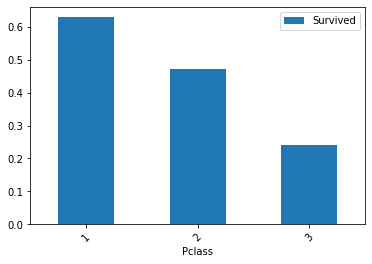

In [25]:
train[['Pclass', 'Survived']].groupby('Pclass').mean().plot(kind = "bar", rot = 45)

### pd.Series.plot(kind = 'hist')

히스토그램

In [26]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

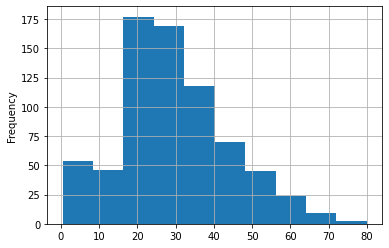

In [27]:
train['Age'].plot(kind = 'hist', bins = 10, grid = True)

## Data Cleansing & Pre-Processing

### pd.Series.isna()

In [31]:
train.isna().sum() / 891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [32]:
train['Age'].mean()

29.69911764705882

In [33]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### pd.DataFrame.fillna()

In [35]:
train['Age'] = train['Age'].fillna(value = train['Age'].mean())
# 결측치를 mean으로 채워주기

In [37]:
train['Age'].isna().sum() # 결측치 없는 것 확인

0

In [38]:
train['Embarked'].fillna(value = 'S', inplace = True)
# 결측치를 S로 채워주기

In [40]:
train['Embarked'].isna().sum() # 결측치 없는 것 확인

0

In [41]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [43]:
test['Age'].fillna(value = train['Age'].mean(), inplace = True)
# test 'Age'를 train 'Age'로 채워주기

In [44]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

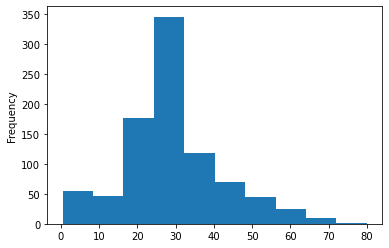

In [45]:
train['Age'].plot(kind = 'hist')

### pd.Series.map()

시리즈 내 값을 변환 할 때 사용하는 함수

In [46]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})

In [47]:
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

## Feature Engineering & Initial Modeling

### sklearn.linear_model.LogisticRegression()

로지스틱 회귀 모형 (0과1 사이의 값 산출)

In [48]:
X_train = train[['Pclass', 'Age']]
y_train = train['Survived']
X_test = test[['Pclass', 'Age']]

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [50]:
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = model.predict(X_test)

In [52]:
submission['Survived'] = y_pred

In [58]:
submission.to_csv('C:/Users/Administrator/Desktop/titanic/lr_model_Pclass_Age.csv', index = False)

### sklearn.tree.DecisionTreeClassifier()

의사결정 나무 모델

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [55]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
submission['Survived'] = dt_model.predict(X_test)

In [59]:
submission.to_csv('C:/Users/Administrator/Desktop/titanic/dt_model.csv', index = False)

## Model Tuning & Evaluation

In [70]:
submission['Survived'] = model.predict_proba(X_test)[:,1]

In [71]:
submission.to_csv('C:/Users/Administrator/Desktop/titanic/lr_proba.csv', index = False)

In [72]:
submission['Survived'] = dt_model.predict_proba(X_test)[:,1]

In [73]:
submission.to_csv('C:/Users/Administrator/Desktop/titanic/dt_proba.csv', index = False)

In [74]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [75]:
dt_model_new = DecisionTreeClassifier(min_samples_split=10)

In [76]:
dt_model_new.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=10)

In [77]:
submission['Survived'] = dt_model_new.predict_proba(X_test)[:, 1]

In [78]:
submission.to_csv('C:/Users/Administrator/Desktop/titanic/dt_min_samples_10_proba.csv', index = False)

In [79]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


In [92]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [81]:
X_train = train[['Pclass', 'Age']]
y_train = train['Survived']
X_test = test[['Pclass', 'Age']]

In [82]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [83]:
y_true = y_train.values

In [84]:
cf_matrix = confusion_matrix(y_true, y_pred)

In [85]:
cf_matrix

array([[466,  83],
       [182, 160]], dtype=int64)

In [86]:
accuracy_score(y_true, y_pred)

0.7025813692480359

In [87]:
(cf_matrix[0,0] + cf_matrix[1,1]) / 891

0.7025813692480359

In [88]:
precision_score(y_true, y_pred)

0.6584362139917695

In [89]:
(cf_matrix[1,1]) / (83 + 160)

0.6584362139917695

In [90]:
recall_bscore(y_true, y_pred)

NameError: name 'recall_bscore' is not defined

In [93]:
(cf_matrix[1,1]) / (182 + 160)

0.4678362573099415

In [94]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       549
           1       0.66      0.47      0.55       342

    accuracy                           0.70       891
   macro avg       0.69      0.66      0.66       891
weighted avg       0.70      0.70      0.69       891



In [95]:
roc_auc_score(y_true, y_pred)

0.6583261432269197

## Conclusion & Discussion

In [96]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [97]:
model_10 = DecisionTreeClassifier(min_samples_split=10)
model_20 = DecisionTreeClassifier(min_samples_split=20)
model_30 = DecisionTreeClassifier(min_samples_split=30)

In [98]:
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

In [99]:
train['Age'] = train['Age'].fillna(value = train['Age'].mean())
test['Age'] = test['Age'].fillna(value = train['Age'].mean())

In [100]:
X_train = train[['Pclass', 'Age']]
y_train = train['Survived']

In [101]:
score_10 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_10.fit(X_trn, y_trn)
    
    y_pred = model_10.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_10.append(roc_auc_score(y_val.values, y_pred))

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


In [102]:
score_10

[0.6663909567135373,
 0.6935200216450217,
 0.6567085953878408,
 0.5899470899470899,
 0.7008647798742138]

In [103]:
score_20 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_20.fit(X_trn, y_trn)
    
    y_pred = model_20.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_20.append(roc_auc_score(y_val.values, y_pred))

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


In [104]:
score_20

[0.6747311827956988,
 0.697443181818182,
 0.658149895178197,
 0.5986111111111111,
 0.6964098532494759]

In [105]:
score_30 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_30.fit(X_trn, y_trn)
    
    y_pred = model_30.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_30.append(roc_auc_score(y_val.values, y_pred))

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


In [106]:
score_30

[0.7031982354562999,
 0.713474025974026,
 0.6565120545073374,
 0.6110449735449734,
 0.7037473794549267]

In [108]:
import numpy as np

In [109]:
np.mean(score_10), np.mean(score_20), np.mean(score_30)

(0.6614862887135406, 0.665069044830533, 0.6775953337875128)

In [110]:
DecisionTreeClassifier()

DecisionTreeClassifier()